Import pack

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import math

Load ADS crash data

In [3]:
ADS_filepath = os.path.join(os.getcwd(), 'datasets', 'SGO-2021-01_Incident_Reports_ADS.csv')
ADS_data = pd.read_csv(ADS_filepath)
ADS_data

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,Investigating Officer Name,Inv. Officer Name - Unknown,Investigating Officer Phone,Inv. Officer Phone - Unknown,Investigating Officer Email,Inv. Officer Email - Unknown,Within ODD?,Within ODD? - CBI,Narrative,Narrative - CBI?
0,30270-3655,1,Waymo LLC,Monthly,7.0,2022.0,AUG-2022,SADHW2S13M1,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On June [XXX], 2022 at approximately 4:50 PM P...",
1,540-3644,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P0XL4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX, 2022, GM Cruise Holdings LLC (...",
2,540-3645,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P09L4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], 2022, GM Cruise Holdings LLC ...",
3,540-3643,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P01N4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], 2022 GM Cruise Holdings LLC (...",
4,540-3647,1,"General Motors, LLC",Monthly,7.0,2022.0,AUG-2022,5G21A6P08L4,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On August [XXX], GM Cruise Holdings LLC (""Crui...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,30270-1,2,Waymo LLC,10-Day Update,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,No update to narrative. Please refer to Waymo ...,
378,30531-6,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",
379,30270-4,1,Waymo LLC,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",
380,30531-2,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On July [XXX], 2021 at 3:10 PM PDT, a Waymo Au...",


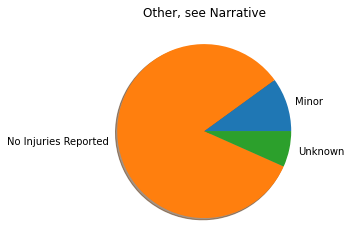

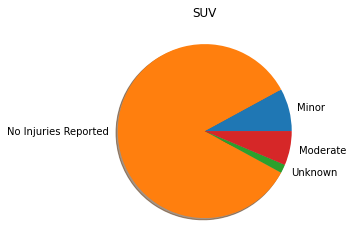

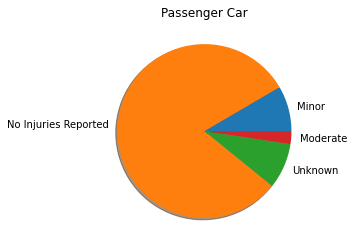

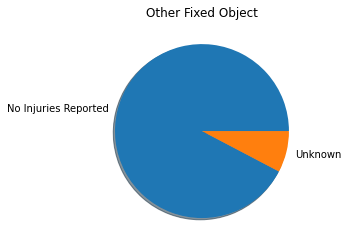

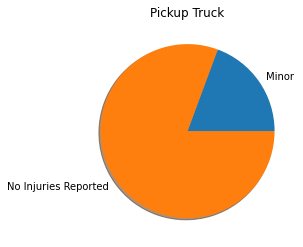

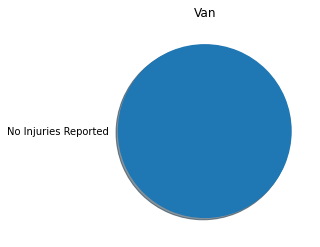

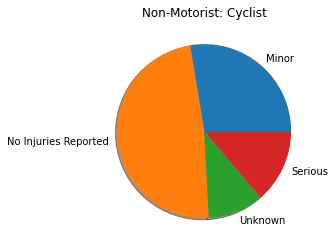

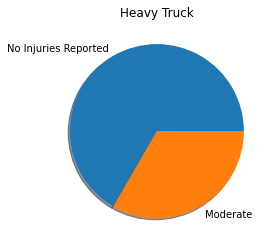

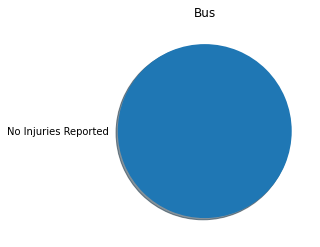

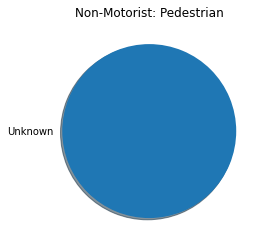

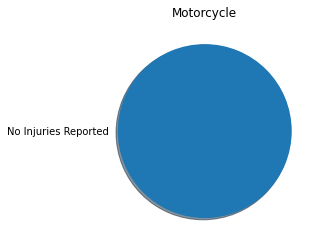

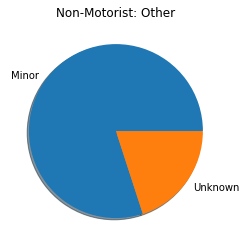

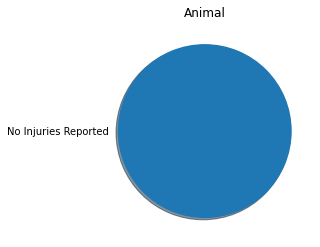

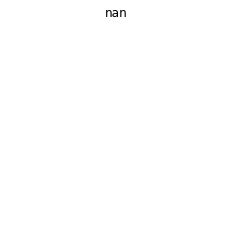

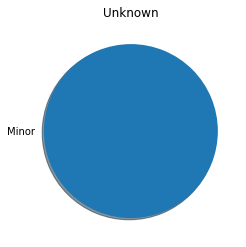

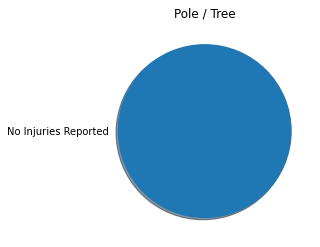

In [4]:
ADS_crashes = ADS_data[['Crash With', 'Highest Injury Severity']]
ADS_crash_types = ADS_crashes['Crash With'].unique()
ADS_crash_severity = ADS_crashes['Highest Injury Severity'].unique()
ADS_crashes

plot_values = dict()

for i in ADS_crash_types:
    plot_values[i] = {}
    crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
    for j in ADS_crash_severity:
        crash_severity = crash_type[crash_type['Highest Injury Severity'] == (j)]['Highest Injury Severity'].count()
        if crash_severity != 0:
            plot_values[i][j] = crash_severity
    if i != 'nan':
        plt.pie(plot_values[i].values(), labels = plot_values[i].keys(), shadow = True)
        plt.title(i)
        plt.show() 

In [20]:
ADS_crashes = ADS_data[['Crash With', 'Roadway Surface']]
ADS_crash_types = ADS_crashes['Crash With'].unique()
ADS_crash_severity = ADS_crashes['Roadway Surface'].unique()

# for i in ADS_crash_types:
#     crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
#     for j in ADS_crash_severity:
#         crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].value_counts()
# #         ADS_crashes['Roadway Surface'].value_counts()
#     print(i, crash_severity)
# fig, axs = plt.subplots(len(ADS_crash_types))
# fig.suptitle('Vertically stacked subplots')
# axes = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]

for a in axes:
    for i in ADS_crash_types:
        crash_severities = []
        environment = []
        crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
        for j in ADS_crash_severity:
            environment.append(j)
            crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface']
            crash_severity_count = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].count()
            crash_severities.append(crash_severity_count)
        for k in range(len(environment)-1):
            if not isinstance(environment[k], str):
                if math.isnan(environment[k]):
                    environment.pop(k)
                    crash_severities.pop(k)
        index = np.where(ADS_crash_types == i)
        axs[index[0], a].plot(environment, crash_severities)
    plt.bar(environment, crash_severities)
    plt.title(i)
plt.show() 



Other, see Narrative Series([], Name: Roadway Surface, dtype: int64)
SUV Series([], Name: Roadway Surface, dtype: int64)
Passenger Car Series([], Name: Roadway Surface, dtype: int64)
Other Fixed Object Series([], Name: Roadway Surface, dtype: int64)
Pickup Truck Snow / Slush / Ice    1
Name: Roadway Surface, dtype: int64
Van Series([], Name: Roadway Surface, dtype: int64)
Non-Motorist: Cyclist Series([], Name: Roadway Surface, dtype: int64)
Heavy Truck Series([], Name: Roadway Surface, dtype: int64)
Bus Series([], Name: Roadway Surface, dtype: int64)
Non-Motorist: Pedestrian Series([], Name: Roadway Surface, dtype: int64)
Motorcycle Series([], Name: Roadway Surface, dtype: int64)
Non-Motorist: Other Series([], Name: Roadway Surface, dtype: int64)
Animal Series([], Name: Roadway Surface, dtype: int64)
nan Series([], Name: Roadway Surface, dtype: int64)
Unknown Series([], Name: Roadway Surface, dtype: int64)
Pole / Tree Series([], Name: Roadway Surface, dtype: int64)


Load ADAS crash data

In [49]:
ADAS_filepath = os.path.join(os.getcwd(), 'datasets', 'SGO-2021-01_Incident_Reports_ADAS.csv')
ADAS_data = pd.read_csv(ADAS_filepath)
ADAS_data

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,Investigating Officer Name,Inv. Officer Name - Unknown,Investigating Officer Phone,Inv. Officer Phone - Unknown,Investigating Officer Email,Inv. Officer Email - Unknown,Within ODD?,Within ODD? - CBI,Narrative,Narrative - CBI?
0,10039-3261,4,"BMW of North America, LLC",Monthly Update,8.0,2022.0,AUG-2022,WBA53BJ08NC,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"Customer narrative: [REDACTED, MAY CONTAIN CO...",Y
1,13781-3622,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,5YJ3E1EB2LF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
2,13781-3621,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,5YJYGDEE0MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
3,13781-3620,1,"Tesla, Inc.",1-Day,NaN,NaN,AUG-2022,7SAYGDEE0NF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
4,13781-3565,2,"Tesla, Inc.",10-Day Update,NaN,NaN,AUG-2022,5YJYGDEE2MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,13781-21,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJYGDEEXMF,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1071,13781-19,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJYGDEE0LF,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1072,13781-14,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJ3E1EB7LF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y
1073,13781-13,1,"Tesla, Inc.",1-Day,NaN,NaN,JUL-2021,5YJ3E1EB0MF,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y


Crash type and with types of crashes

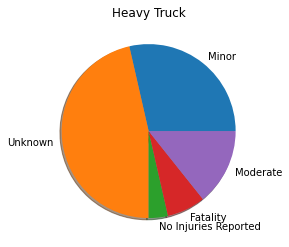

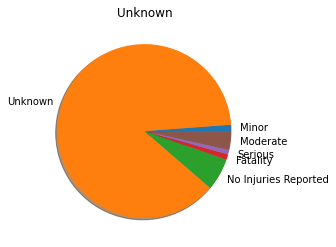

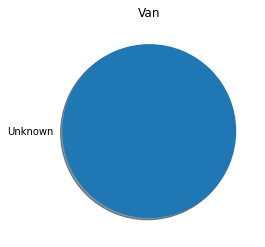

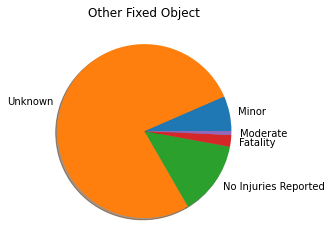

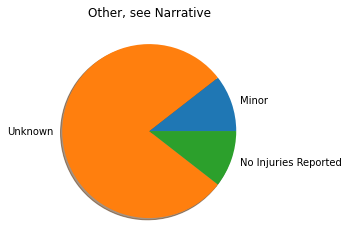

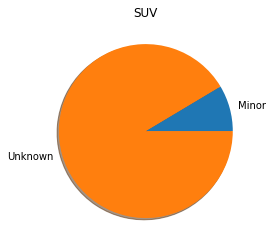

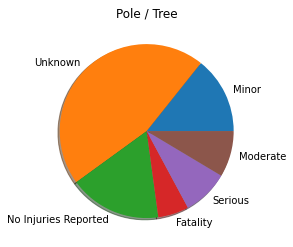

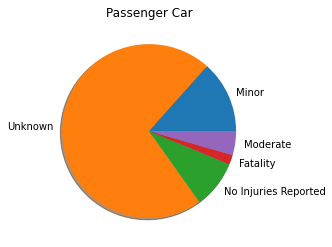

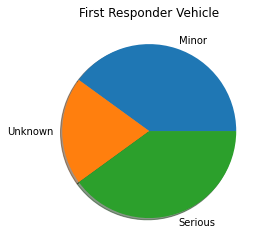

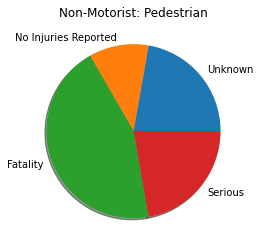

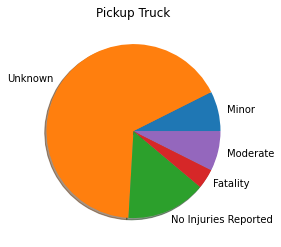

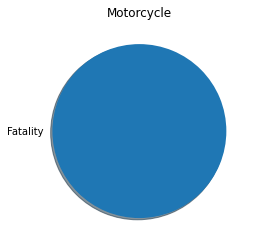

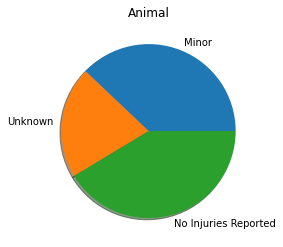

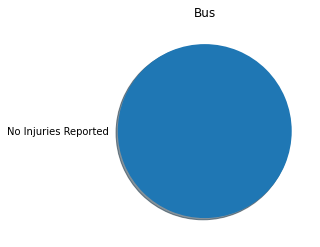

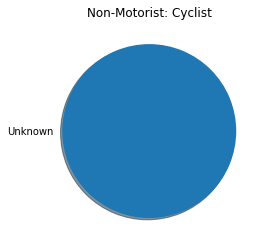

In [7]:
ADAS_crashes = ADAS_data[['Crash With', 'Highest Injury Severity']]
ADAS_crash_types = ADAS_crashes['Crash With'].unique()
ADAS_crash_severity = ADAS_crashes['Highest Injury Severity'].unique()
ADAS_crashes

plot_values = dict()

for i in ADAS_crash_types:
    plot_values[i] = {}
    crash_type = ADAS_crashes[ADAS_crashes['Crash With'] == (i)]
    for j in ADAS_crash_severity:
        crash_severity = crash_type[crash_type['Highest Injury Severity'] == (j)]['Highest Injury Severity'].count()
        if crash_severity != 0:
            plot_values[i][j] = crash_severity
    if i != 'nan':
        plt.pie(plot_values[i].values(), labels = plot_values[i].keys(), shadow = True)
        plt.title(i)
        plt.show() 

Environment of crash depending on crash type for ADAS

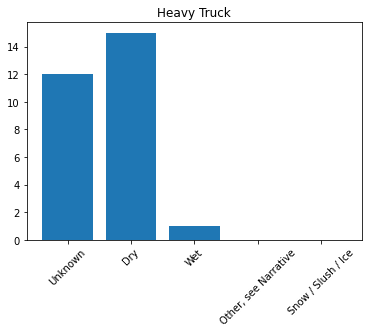

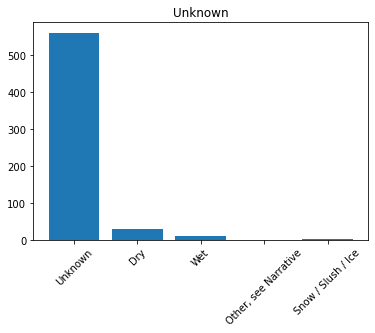

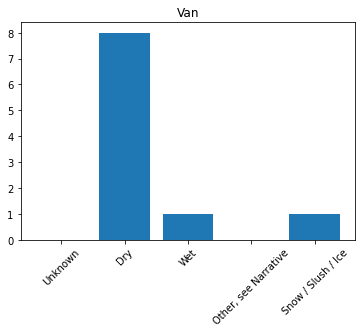

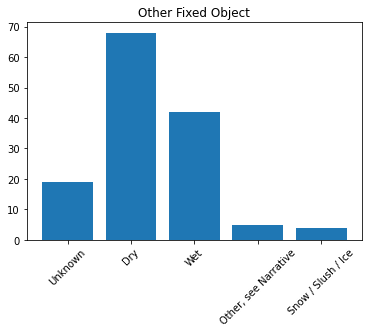

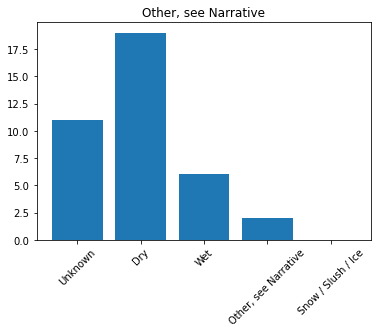

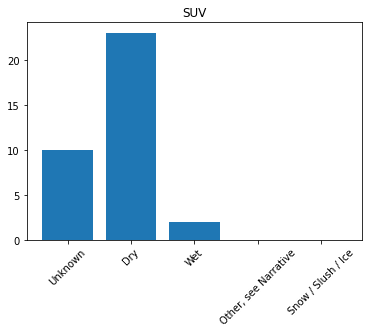

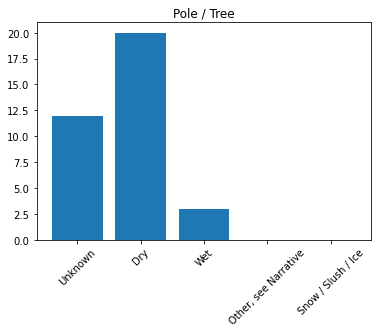

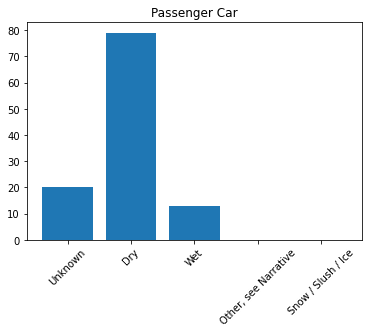

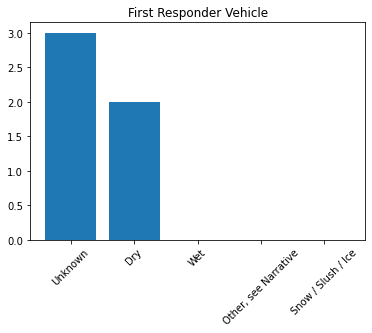

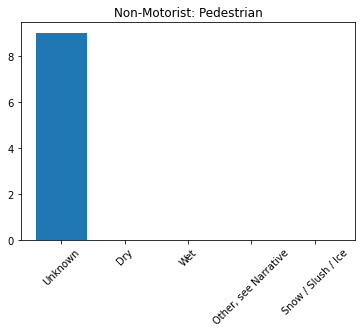

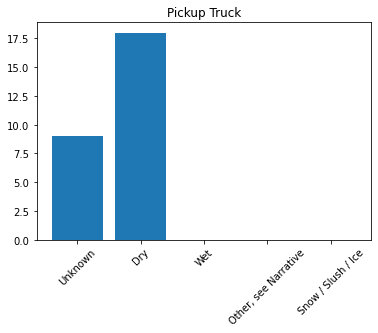

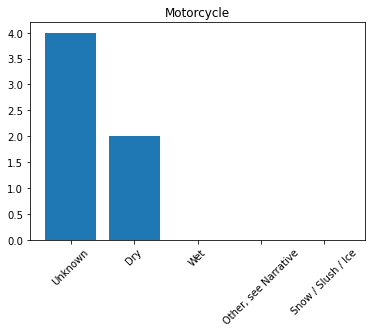

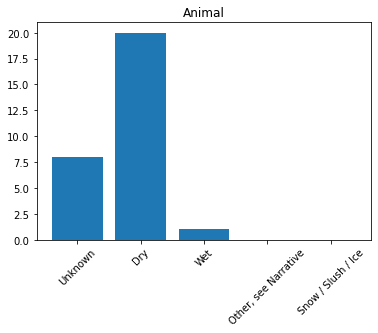

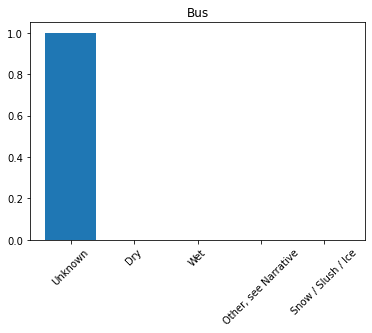

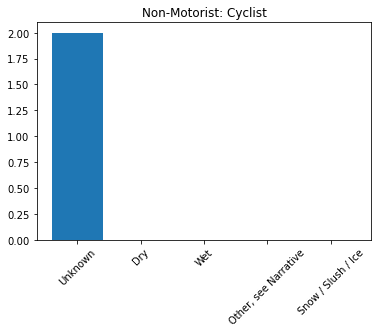

In [52]:
ADAS_crashes = ADAS_data[['Crash With', 'Roadway Surface']]
ADAS_crash_types = ADAS_crashes['Crash With'].unique()
ADAS_crash_severity = ADAS_crashes['Roadway Surface'].unique()
ADAS_crashes

for i in ADAS_crash_types:
    crash_severities = []
    environment = []
    crash_type = ADAS_crashes[ADAS_crashes['Crash With'] == (i)]
    for j in ADAS_crash_severity:
        environment.append(j)
        crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface']
        crash_severity_count = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].count()
        crash_severities.append(crash_severity_count)
    for k in range(len(environment)-1):
        if not isinstance(environment[k], str):
            if math.isnan(environment[k]):
                environment.pop(k)
                crash_severities.pop(k)
    plt.bar(environment, crash_severities)
    plt.xticks(rotation = 45)
    plt.title(i)
    plt.show() 

Initially, I thought there would be more crashes in wet weather since you need to break earlier to come to a stop and it can be more difficult to control a car in wet weather. However, for all vehicle crash type, there are more crashes with vehicles in dry conditions. This is most likely due to the fact the majority of the cars driving in the study are in California and New Mexico where the weather is dry the majority of the time

Environment of crash depending on crash type for ADS

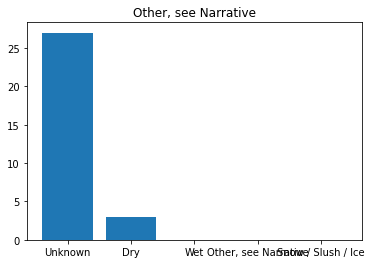

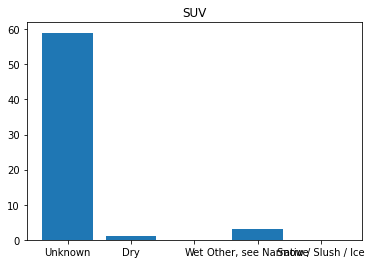

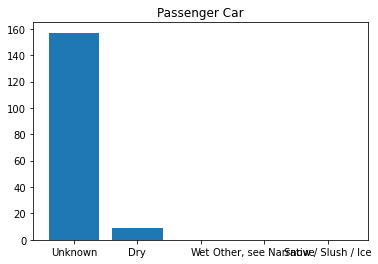

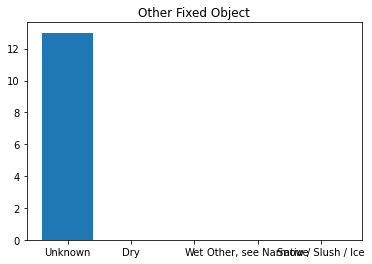

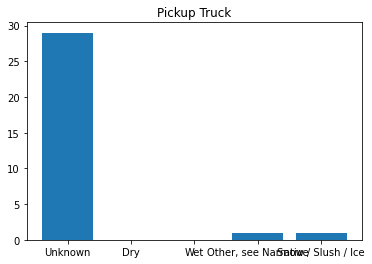

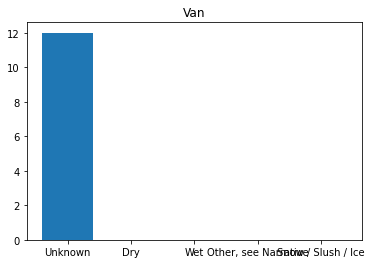

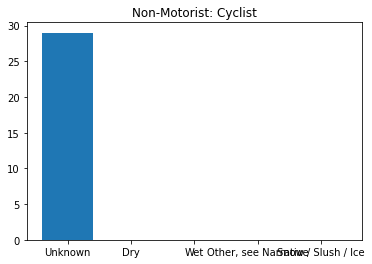

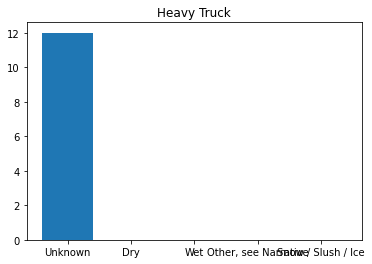

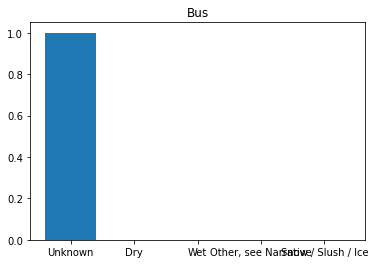

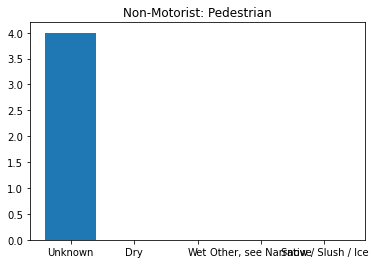

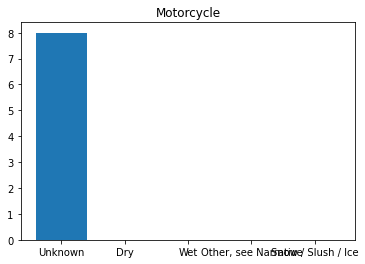

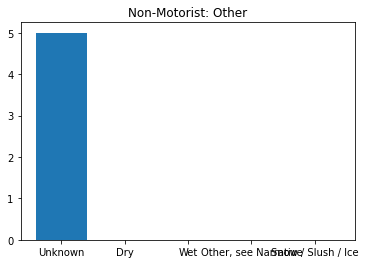

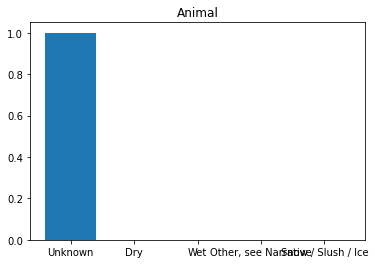

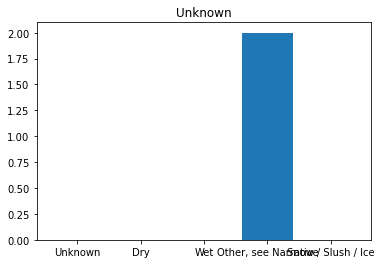

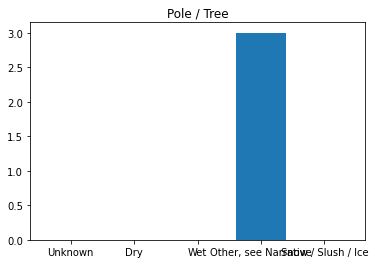

In [97]:
ADS_crashes = ADS_data[['Crash With', 'Roadway Surface']]
ADS_crash_types = ADS_crashes['Crash With'].unique()
crash_severities = ADS_crashes['Roadway Surface'].unique()
ADS_crash_types = [item for item in ADS_crash_types if not(pd.isnull(item)) == True]

# a = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]
# b = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]
# fig, axs = plt.subplots(nrows=5, ncols=3)
# fig.suptitle('Plots')
environment = [item for item in environment if not(pd.isnull(item)) == True]
for i in ADS_crash_types:
    crash_severities = []
    crash_type = ADS_crashes[ADS_crashes['Crash With'] == (i)]
    for j in ADS_crash_severity:
        crash_severity = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface']
        crash_severity_count = crash_type[crash_type['Roadway Surface'] == (j)]['Roadway Surface'].count()
        crash_severities.append(crash_severity_count)
    for k in range(len(environment)-1):
        if not isinstance(crash_severities, str):
            if math.isnan(crash_severities[k]):
                crash_severities.pop(k)
# df = pd.DataFrame({'crash_severities': crash_severities}, index = environment)
# ax = axs[a][b]
# print(ax)
# df.plot.bar(rot=45, figsize=(6,4), ax=ax)
    plt.bar(environment, crash_severities)
    plt.title(i)
    plt.show() 

The results are pretty similar for ADS and ADAS. However, ADAS are have a lot more crashes in wet conditions that ADS does when it comes to crashing into fixed objects (such as a lampost).

Text(0.5, 1.0, 'Number Of Crashes vs Road Type')

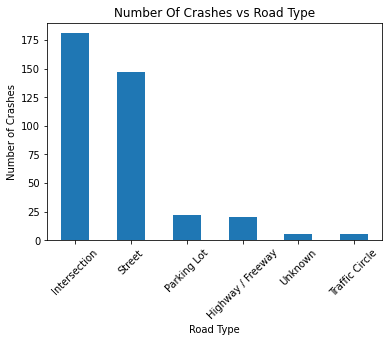

In [41]:
ADS_roadway = ADS_data['Roadway Type']
road_types = ADS_data['Roadway Type'].value_counts()
ax = road_types.plot.bar(rot=45)
ax.set_ylabel('Number of Crashes')
ax.set_xlabel('Road Type')
ax.set_title('Number Of Crashes vs Road Type')

Text(0.5, 1.0, 'Number Of Crashes vs Road Type')

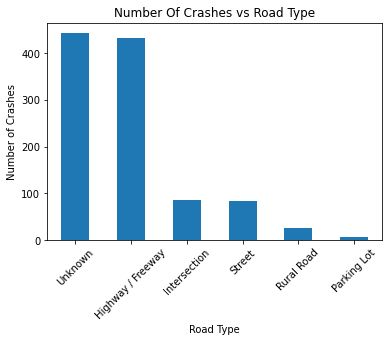

In [98]:
ADAS_roadway = ADAS_data['Roadway Type']
road_types = ADAS_data['Roadway Type'].value_counts()
ax = road_types.plot.bar(rot=45)
ax.set_ylabel('Number of Crashes')
ax.set_xlabel('Road Type')
ax.set_title('Number Of Crashes vs Road Type')

ADS clearly has the most crashes when driving in a street or intersection which is interesting and something to focus on. Intersections can be quite tight and harder to navigate on and streets can have a lot of humans/kids that run onto the road out of nowhere as well as cars stopping abruptly. What would be interesting would be to look into what caused this accident and the fatality of it as well as how to avoid this. 

On the other hand, for ADAS there are many more crashes in uknown places and the highway. The highway may be due to lack of attention on a long straight road/falling half asleep. Unknown makes the study harder to conduct.